## Analysing two csv files related to total population and diabetes prevalance rate of all countries

Loading all required libraries

In [1]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings 
library(stringr) # to hand strings
library(rvest) # to make scraping easier
library(polite) #polite version of rvest
library(htmltab)
library(dplyr)
library(tidyr)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'glue'

The following object is masked from 'package:dplyr':

    collapse

Loading required package: xml2

Attaching package: 'rvest'

The following object is masked from 'package:purrr':

    pluck

The following object is masked from 'package:readr':

    guess_encoding



ERROR: Error in library(htmltab): there is no package called 'htmltab'


In [15]:
library(visdat)
library(skimr)
library(readr)

 Reading the file for population of all countries. Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates. This data is sourced from following sources.
 (1) United Nations Population Division. World Population Prospects: 2017 Revision
 (2) Census reports and other statistical publications from national statistical offices
 (3) Eurostat: Demographic Statistics
 (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years)
 (5) U.S. Census Bureau: International Database 
 (6) Secretariat of the Pacific Community: Statistics and Demography Programme.

In [2]:
population_df <- read_csv(file = "API_SP.POP.TOTL_DS2_en_csv_v2_10134466.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character()
)
See spec(...) for full column specifications.


In [19]:
population_df %>% glimpse()

Observations: 264
Variables: 62
$ `Country Name`   <chr> "Aruba", "Afghanistan", "Angola", "Albania", "Ando...
$ `Country Code`   <chr> "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "...
$ `Indicator Name` <chr> "Population, total", "Population, total", "Populat...
$ `Indicator Code` <chr> "SP.POP.TOTL", "SP.POP.TOTL", "SP.POP.TOTL", "SP.P...
$ `1960`           <dbl> 54211, 8996351, 5643182, 1608800, 13411, 92490932,...
$ `1961`           <dbl> 55438, 9166764, 5753024, 1659800, 14375, 95044497,...
$ `1962`           <dbl> 56225, 9345868, 5866061, 1711319, 15370, 97682294,...
$ `1963`           <dbl> 56695, 9533954, 5980417, 1762621, 16412, 100411076...
$ `1964`           <dbl> 57032, 9731361, 6093321, 1814135, 17469, 103239902...
$ `1965`           <dbl> 57360, 9938414, 6203299, 1864791, 18549, 106174988...
$ `1966`           <dbl> 57715, 10152331, 6309770, 1914573, 19647, 10923059...
$ `1967`           <dbl> 58055, 10372630, 6414995, 1965598, 20758, 11240693...
$ `1968`           <

Reading the file of diabetes prevalance rate of all countries. Diabetes prevalence refers to the percentage of people ages 20-79 who have type 1 or type 2 diabetes. This data is sourced from International Diabetes Federation, Diabetes Atlas.

In [3]:
diabetes_df <- read_csv(file = "API_SH.STA.DIAB.ZS_DS2_en_csv_v2_10136460.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  `2017` = col_double()
)
See spec(...) for full column specifications.


In [4]:
#Selecting only the data for 2017 since other columns dont have any value
diabetes_df<-diabetes_df %>% select('Country Name','Country Code','Indicator Name','Indicator Code','2017')

In [95]:
diabetes_df %>% glimpse()

Observations: 264
Variables: 5
$ `Country Name`   <chr> "Aruba", "Afghanistan", "Angola", "Albania", "Ando...
$ `Country Code`   <chr> "ABW", "AFG", "AGO", "ALB", "AND", "ARB", "ARE", "...
$ `Indicator Name` <chr> "Diabetes prevalence (% of population ages 20 to 7...
$ `Indicator Code` <chr> "SH.STA.DIAB.ZS", "SH.STA.DIAB.ZS", "SH.STA.DIAB.Z...
$ `2017`           <dbl> 11.62000, 9.59000, 3.94000, 10.08000, 7.97000, 12....


In [5]:
#Selecting only the required columns for joining
population_2017_df<-population_df %>% select('Country Code','2017')

In [6]:
population_2017_df %>%  head()

Country Code,2017
ABW,105264
AFG,35530081
AGO,29784193
ALB,2873457
AND,76965
ARB,414491886


In [7]:
diabetes_population<-diabetes_df %>% inner_join(population_2017_df,by="Country Code") #%>% rename(replace=c("2017.y"="TotalPopulation")

In [8]:
#Renaming the column of 2017 in two tables to Population_2017 and Diabetes_prevalance_2017 respectively
population_2017_df  <- population_2017_df %>% rename("Population_2017" = !!names(.[2]))
diabetes_df  <- diabetes_df %>% rename("Diabetes_prevalance_2017" = !!names(.[5]))

In [9]:
population_2017_df %>% head()
diabetes_df %>% head()

Country Code,Population_2017
ABW,105264
AFG,35530081
AGO,29784193
ALB,2873457
AND,76965
ARB,414491886


Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017
Aruba,ABW,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,11.62000
Afghanistan,AFG,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.59000
Angola,AGO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,3.94000
Albania,ALB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,10.08000
Andorra,AND,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,7.97000
Arab World,ARB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,12.07702


In [28]:
#Joining the population data and diabetes data
diabetes_population<-diabetes_df %>% inner_join(population_2017_df,by="Country Code") 

In [29]:
diabetes_population %>% head()

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017
Aruba,ABW,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,11.62000,105264
Afghanistan,AFG,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.59000,35530081
Angola,AGO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,3.94000,29784193
Albania,ALB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,10.08000,2873457
Andorra,AND,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,7.97000,76965
Arab World,ARB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,12.07702,414491886


In [30]:
#Converting the diabetes pevalance percentage to population
diabetes_population<-diabetes_population %>% mutate(New_diabetes_population=(Diabetes_prevalance_2017/100)*Population_2017)

In [31]:
diabetes_population %>% head()

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
Aruba,ABW,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,11.62000,105264,12231.68
Afghanistan,AFG,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,9.59000,35530081,3407334.77
Angola,AGO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,3.94000,29784193,1173497.20
Albania,ALB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,10.08000,2873457,289644.47
Andorra,AND,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,7.97000,76965,6134.11
Arab World,ARB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,12.07702,414491886,50058269.71


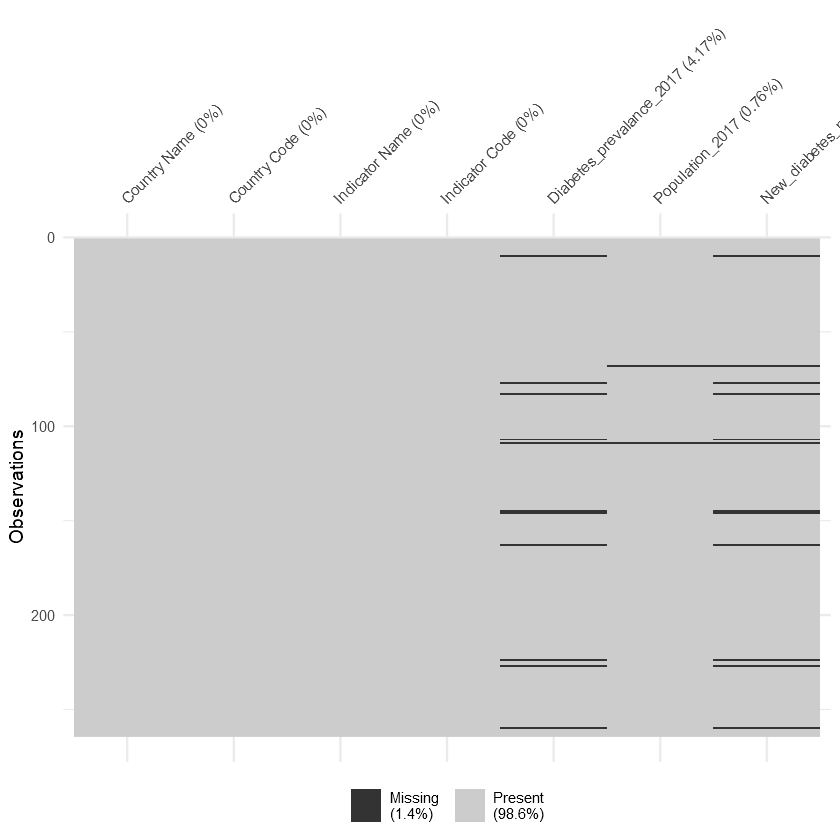

In [32]:
diabetes_population %>% vis_miss()

In [33]:
diabetes_free_countries<-diabetes_population %>% filter(is.na(Diabetes_prevalance_2017) == TRUE) 

In [34]:
diabetes_free_countries<-diabetes_free_countries %>% drop_na(Population_2017)
diabetes_population<-diabetes_population %>% drop_na(Population_2017)

In [27]:
diabetes_free_countries

Country Name,Country Code,Indicator Name,Indicator Code,Diabetes_prevalance_2017,Population_2017,New_diabetes_population
American Samoa,ASM,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,55641,NA
Faroe Islands,FRO,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,49290,NA
Gibraltar,GIB,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,34571,NA
Isle of Man,IMN,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,84287,NA
"Macao SAR, China",MAC,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,622567,NA
St. Martin (French part),MAF,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,32125,NA
Northern Mariana Islands,MNP,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,55144,NA
Sint Maarten (Dutch part),SXM,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,41109,NA
Turks and Caicos Islands,TCA,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,35446,NA
Kosovo,XKX,Diabetes prevalence (% of population ages 20 to 79),SH.STA.DIAB.ZS,NA,1830700,NA


In [37]:
diabetes_free_countries<-diabetes_free_countries %>% replace_na(list(Diabetes_prevalance_2017=0,New_diabetes_population=0))
diabetes_population<-diabetes_population %>% replace_na(list(Diabetes_prevalance_2017=0,New_diabetes_population=0))

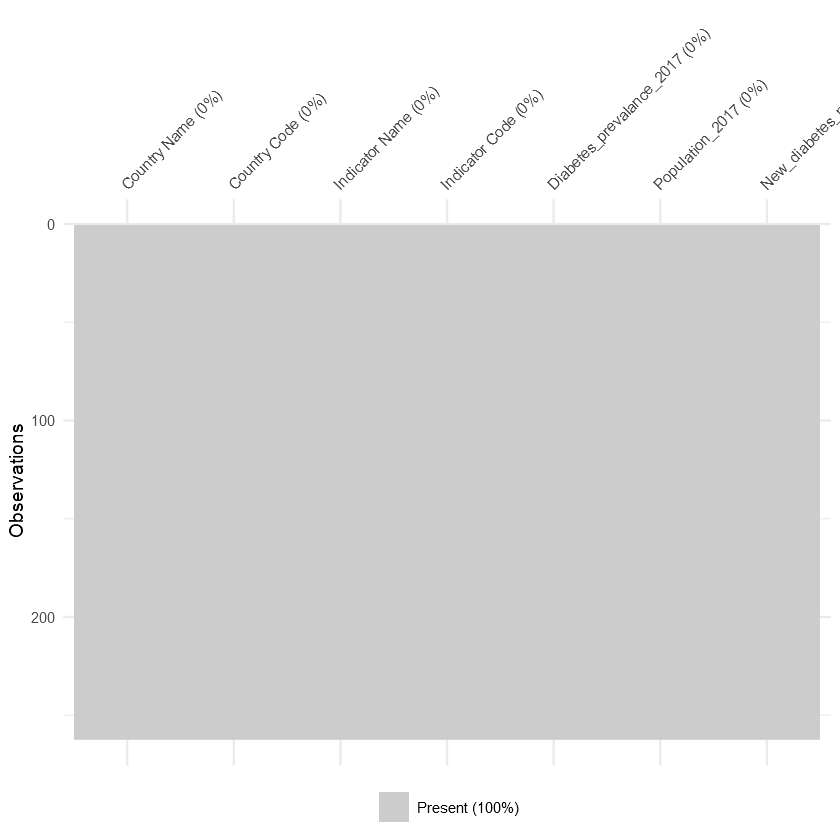

In [38]:
diabetes_population %>% vis_miss()